In [1]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt

For this problem, we will need to consider both the forces and torques on the rod. Since the mass is attached to the rod, we can treat them as one rigid body, with the centre of mass at the mass since the rod is massless. The coordinates of the mass are given by
$$
\begin{align}
x &= l \sin\theta,\; & \dot{x} &= l\dot{\theta} \cos\theta,\;   & \ddot{x} &= l \left(\ddot{\theta} \cos\theta - \dot{\theta}^2 \sin\theta \right) \\
y &= A\, cos(\omega t) + l \cos\theta,\; & \dot{x} &= - A \omega\, sin(\omega t) - l\dot{\theta} \sin\theta,\; & \ddot{x} &= - A \omega^2\, cos(\omega t) - l \left(\ddot{\theta} \sin\theta + \dot{\theta}^2 \cos\theta \right)
\end{align}
$$
where theta is the angle between the rod and the vertical.

We can then write Newton's laws and the torque equation about the centre of mass as such:
Force in x: $m \ddot{x} = m l \left(\ddot{\theta} \cos\theta - \dot{\theta}^2 \sin\theta \right) = F_{pivot,x}$
Force in y: $m \ddot{y} = - m \left(A \omega^2\, cos(\omega t) + l(\ddot{\theta} \sin\theta + \dot{\theta}^2 \cos\theta) \right) = F_{pivot,y} - m g$
Torque balance: $0 = - l \cos\theta \, F_{pivot,x} + l \sin\theta \, F_{pivot,y}$

We can eliminate $F_{pivot,x}$ and $F_{pivot,y}$ to obtain
$$
\ddot{\theta} = \frac{\left(g - A \omega^2 \cos(\omega t) \right) \sin\theta}{l}
$$

Substituting $\omega_o = \sqrt{\frac{g}{l}}$ and $a = \frac{A}{l}$, we get this simplified equation:
$$
\ddot{\theta} = \left(\omega_o^2 - a \omega^2 \cos(\omega t) \right) \sin\theta
$$

The code below integrates this ode, but simplifying assumptions will be made later for an analytical solution

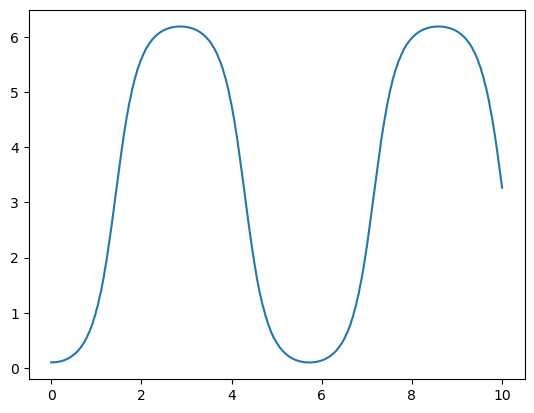

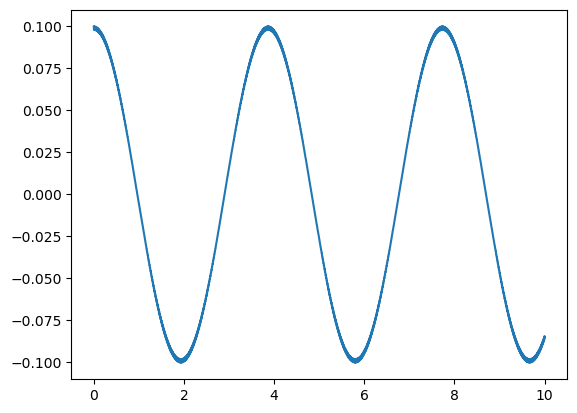

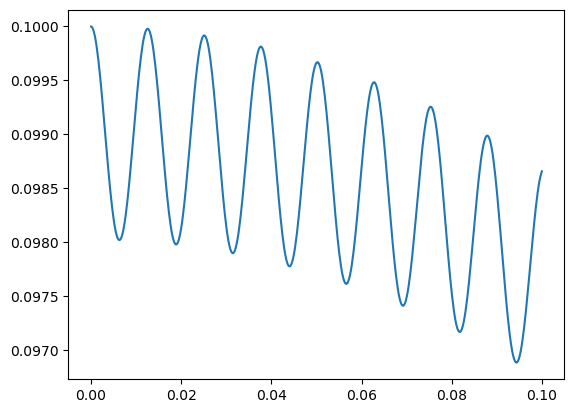

In [89]:
def inverted_pendulum(t, vec, g, l, A, omega):
    theta, thetap = vec

    return [
        thetap,
        # np.sin(theta) * (g - A * np.power(omega, 2) * np.cos(omega * t) + A * np.cos(omega * t) * np.power(thetap, 2)) / (l + A * np.cos(omega * t) * np.cos(theta))
        (g - A * np.power(omega, 2) * np.cos(omega * t)) * np.sin(theta) / l
    ]

# upper position not stable
g = 9.81
l = 1
A = 0.01
omega = 100

theta_o = 0.1
tend = 10

sol = integrate.solve_ivp(inverted_pendulum, [0, tend], [theta_o, 0], args=[g, l, A, omega], max_step=0.1/omega)

plt.plot(sol.t, sol.y[0])
plt.show()

# upper position stable
g = 9.81
l = 1
A = 0.01
omega = 500

theta_o = 0.1
tend = 10

sol = integrate.solve_ivp(inverted_pendulum, [0, tend], [theta_o, 0], args=[g, l, A, omega], max_step=0.1/omega)

plt.plot(sol.t, sol.y[0])
plt.show()

sol = integrate.solve_ivp(inverted_pendulum, [0, 0.1], [theta_o, 0], args=[g, l, A, omega], max_step=0.1/omega)

plt.plot(sol.t, sol.y[0])
plt.show()

We can use this to make a phase plot for when the upright position is stable, plotting $a$ against $\omega$.

In [2]:
g = 9.81
l = 1
tend = 10
theta_o = 0.1

def inverted_pendulum(t, vec, g, l, A, omega):
    theta, thetap = vec

    return [
        thetap,
        # np.sin(theta) * (g - A * np.power(omega, 2) * np.cos(omega * t) + A * np.cos(omega * t) * np.power(thetap, 2)) / (l + A * np.cos(omega * t) * np.cos(theta))
        (g - A * np.power(omega, 2) * np.cos(omega * t)) * np.sin(theta) / l
    ]

def is_stable(a, omega):
    A = a * l

    sol = integrate.solve_ivp(inverted_pendulum, [0, tend], [theta_o, 0], args=[g, l, A, omega], max_step=0.01)

    return np.mean(sol.y[0]) < theta_o

In [12]:
omega_values = np.linspace(50, 300, 50)
a_values = []
a = 0

for omega in omega_values:
    a = max(0, 2 * a / 3)
    res = False

    while not res and a < 0.2:
        a += 0.0005
        res = is_stable(a, omega)

    print([omega, a])

    a_values.append(a)

[50.0, 0.08900000000000007]
[55.10204081632653, 0.0808333333333334]
[60.20408163265306, 0.07388888888888895]
[65.3061224489796, 0.06825925925925931]
[70.40816326530611, 0.06350617283950621]
[75.51020408163265, 0.058837448559670824]
[80.61224489795919, 0.05522496570644723]
[85.71428571428572, 0.052316643804298166]
[90.81632653061224, 0.04937776253619879]
[95.91836734693877, 0.046418508357465874]
[101.0204081632653, 0.04444567223831059]
[106.12244897959184, 0.042130448158873735]
[111.22448979591837, 0.04008696543924917]
[116.3265306122449, 0.03822464362616612]
[121.42857142857143, 0.03698309575077742]
[126.53061224489795, 0.03515539716718495]
[131.6326530612245, 0.03393693144478997]
[136.73469387755102, 0.032624620963193324]
[141.83673469387753, 0.03174974730879555]
[146.9387755102041, 0.030666498205863712]
[152.0408163265306, 0.02944433213724248]
[157.14285714285714, 0.028629554758161663]
[162.24489795918367, 0.02758636983877445]
[167.34693877551018, 0.02689091322584964]
[172.4489795918

AttributeError: module 'matplotlib.pyplot' has no attribute 'legends'

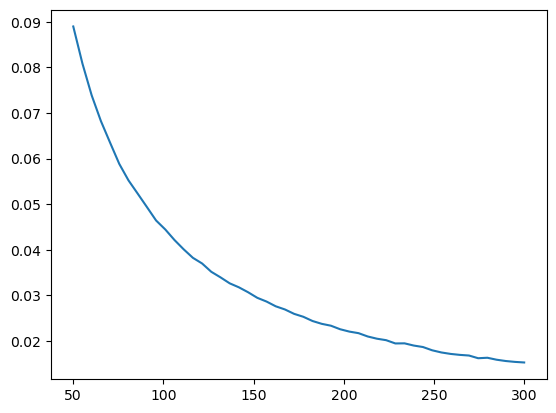

In [13]:
plt.plot(omega_values, a_values, label="numerical")
plt.legends()
plt.show()

Here, we can see that at some values of $A$ and $\omega$, the upright position with $\theta=0$ is stable, while at others it is not stable and the downward position with $\theta=\pi$ is stable.
Considering the case that the upright position is stable, we can zoom into the graph and see that $\theta$ rapidly oscillates at $\omega$ with a small amplitude. Thus, we make the approximation $\theta = C + b \cos(\omega t)$, where C and b depend on time. We also assume that $b \ll C$.
We can plug this into the equation of motion from before, ignoring time derivatives of $b$ and $C$ and make the small angle approximation for $\theta$. We also assume $a \ll 1$ and $a \omega^2 \gg \omega_o^2$, yielding
$$
\omega^2 b \cos(\omega t) + a \omega^2 C \cos(\omega t) \approx 0
$$
So, $b = a C$ and $\theta = C \left(1 + a \cos(\omega t) \right)$

Taking the time average of the equation of motion,
$$
\begin{align}
\overline{\ddot{\theta}} &= \overline{- \theta \left(a \omega^2 \cos(\omega t) - \omega_o^2 \right)} \\
&\approx \overline{- C \left(1 + a \cos(\omega t) \right) \left(a \omega^2 \cos(\omega t) - \omega_o^2 \right)} \\
&= - C(a^2 \omega^2 \overline{\cos^2(\omega t)} - \omega_o^2) \\
&= - C(\frac{1}{2} a^2 \omega^2 - \omega_o^2) \\
&= - C \Omega^2
\end{align}
$$
with $\Omega = \sqrt{\frac{1}{2} a^2 \omega^2 - \omega_o^2}$

From the definition of $\theta = C \left(1 + a \cos(\omega t) \right)$, we get that $\overline{\ddot{\theta}} = \ddot{C}$. Thus,
$$
\ddot{C} + \Omega^2 C = 0
$$
which is the equation for SHM. For $\theta = 0$ to be an equilibrium, $\Omega$ has to be real, so $a^2 \omega^2 > 2 \omega_o^2$. This sets the condition for the upright position to be stable, and we can compare it with the numerically obtained phase plot for stability of the upright position.

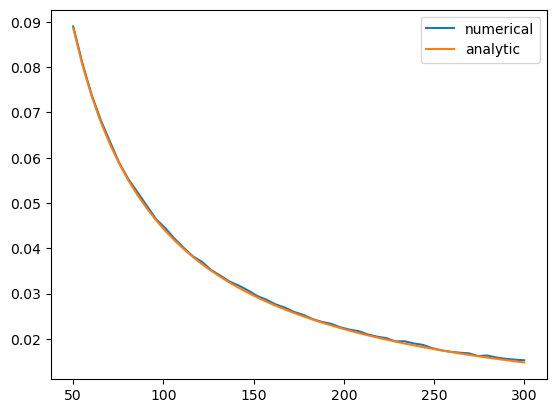

In [19]:
a_values_analytic = np.sqrt(2 * g / l) / omega_values

plt.plot(omega_values, a_values, label="numerical")
plt.plot(omega_values, a_values_analytic, label="analytic")
plt.legend()
plt.show()

As we can see, the numerical and analytic solutions agree with each other very well.

Generating Data:

In [38]:
def inverted_pendulum(t, vec, g, l, A, omega):
    theta, thetap = vec

    return [
        thetap,
        # np.sin(theta) * (g - A * np.power(omega, 2) * np.cos(omega * t) + A * np.cos(omega * t) * np.power(thetap, 2)) / (l + A * np.cos(omega * t) * np.cos(theta))
        (g - A * np.power(omega, 2) * np.cos(omega * t)) * np.sin(theta) / l
    ]

g = 9.81
l = 1
A = 0.04 + 0.002 * (np.random.random() - 0.5)
omega = 140 + 5 * (np.random.random() - 0.5)

theta_o = 0.1 + 0.01 * (np.random.random() - 0.5)
tend = 10
dt = 1 / 60

sol = integrate.solve_ivp(inverted_pendulum, [0, tend], [theta_o, 0], args=[g, l, A, omega], max_step=min(0.1/omega, dt))

data = []

t = 0
for i in range(len(sol.t)):
    if sol.t[i] - t >= dt:
        t = sol.t[i]
        data.append([sol.t[i], sol.y[0][i] + 0.02 * (np.random.random() - 0.5)])

with open("data/inverted pendulum/rod 1/set9/data3.csv", "w") as f:
    np.savetxt(f, data, fmt="%.3f", delimiter=",")